In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from datetime import datetime

In [ ]:
df1=pd.read_csv('imu_data3.csv')
df2=pd.read_csv('imu_data4.csv')

In [124]:
df1.info

<bound method DataFrame.info of                time   Roll  Pitch   Yaw
0      17:38:47.384 -27.52  56.29   5.0
1      17:38:47.414 -26.38  57.12   6.0
2      17:38:47.446 -25.09  57.95   6.0
3      17:38:47.504 -23.66  58.81   6.0
4      17:38:47.536 -22.03  59.74   6.0
...             ...    ...    ...   ...
15413  17:47:38.325 -48.24  -0.84   2.0
15414  17:47:38.353 -47.42   1.17  24.0
15415  17:47:38.383 -47.88   2.71  24.0
15416  17:47:38.413 -48.59   4.08  24.0
15417  17:47:38.443 -48.75   5.44  25.0

[15418 rows x 4 columns]>

In [117]:
df2.info

<bound method DataFrame.info of               time    Roll  Pitch  Yaw
0     17:39:11.511  256.64  14.51  2.0
1     17:39:11.598  252.56  13.75  3.0
2     17:39:11.781  254.28  13.91  3.0
3     17:39:11.807  256.94  14.19  2.0
4     17:39:11.904  257.36  14.30  2.0
...            ...     ...    ...  ...
8529  17:53:37.221  -59.73  16.11  NaN
8530  17:53:37.284  -60.05  15.97  NaN
8531  17:53:37.401  -59.98  16.02  NaN
8532  17:53:37.496  -61.31  15.97  NaN
8533  17:53:37.583  -59.77  15.79  NaN

[8534 rows x 4 columns]>

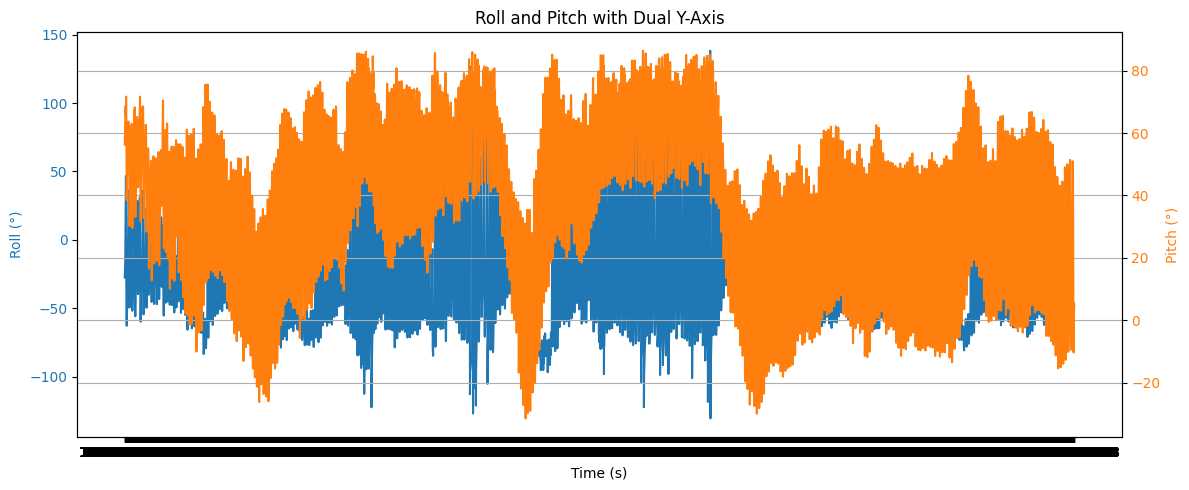

In [125]:
import matplotlib.pyplot as plt

# Figure 및 두 축 생성
fig, ax1 = plt.subplots(figsize=(12, 5))

# ▶ 왼쪽 y축: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (°)", color=color)
ax1.plot(df1["time"], df1["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ▶ 오른쪽 y축: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (°)", color=color)
ax2.plot(df1["time"], df1["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)

# 제목, 격자 등
plt.title("Roll and Pitch with Dual Y-Axis")
fig.tight_layout()
plt.grid(True)
plt.show()

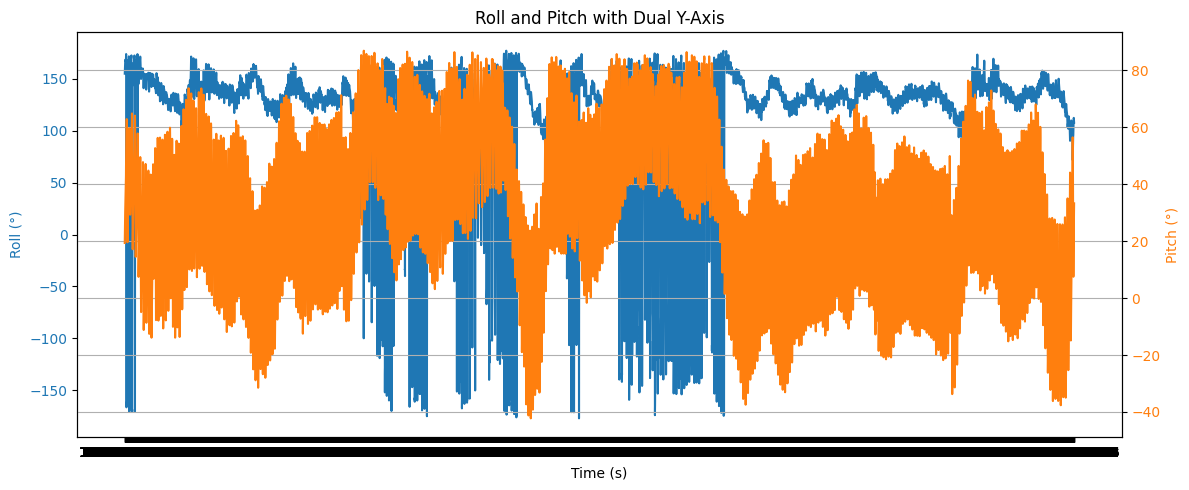

In [126]:
import matplotlib.pyplot as plt

# Figure 및 두 축 생성
fig, ax1 = plt.subplots(figsize=(12, 5))

# ▶ 왼쪽 y축: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (°)", color=color)
ax1.plot(df2["time"], df2["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ▶ 오른쪽 y축: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (°)", color=color)
ax2.plot(df2["time"], df2["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)

# 제목, 격자 등
plt.title("Roll and Pitch with Dual Y-Axis")
fig.tight_layout()
plt.grid(True)
plt.show()

In [120]:
df.head(10)

,time,Roll,Pitch,Yaw,TimeSec
0,17:46:00.019,240.89,-31.86,NaN,63960.019
1,17:46:00.139,233.23,-16.40,NaN,63960.139
2,17:46:00.231,260.88,11.89,1.00,63960.231
3,17:46:00.320,246.34,-7.45,1.00,63960.320
4,17:46:00.441,-72.98,16.83,1.00,63960.441
5,17:46:00.531,4.17,3.66,5.79,63960.531
6,17:46:00.620,266.81,16.63,0.00,63960.620
7,17:46:00.739,232.56,14.47,NaN,63960.739
8,17:46:00.861,265.40,20.24,NaN,63960.861
9,17:46:00.919,-6.62,12.58,-9.00,63960.919


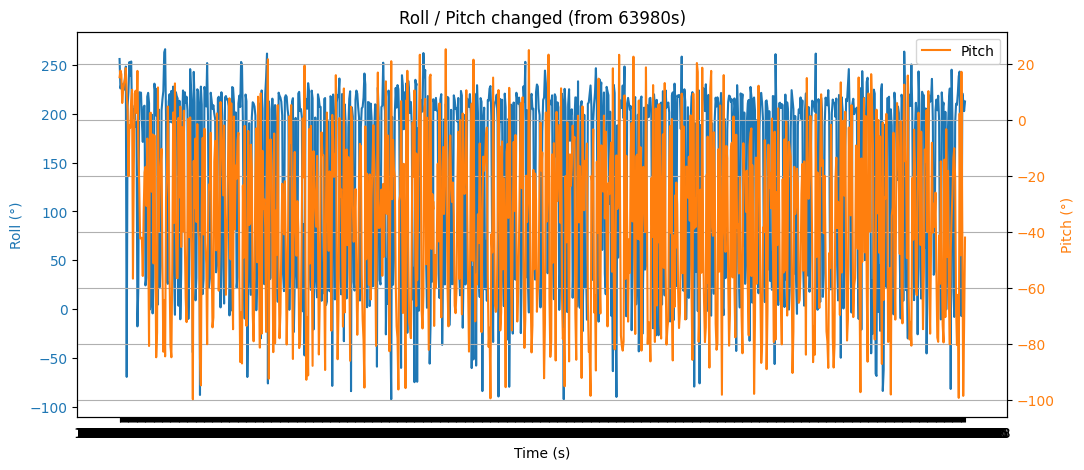

In [121]:
# TimeSec >= 63980인 구간만 필터링 (이상치 제거? 오류값 제거?)
df_filtered = df[df["TimeSec"] >= 63980]

# Figure 및 두 축 생성
fig, ax1 = plt.subplots(figsize=(12, 5))
# Roll / Pitch 그래프 다시 그리기
# ▶ 왼쪽 y축: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (°)", color=color)
ax1.plot(df_filtered["time"], df_filtered["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ▶ 오른쪽 y축: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (°)", color=color)
ax2.plot(df_filtered["time"], df_filtered["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Roll / Pitch changed (from 63980s)")
plt.legend()
plt.grid()
plt.show()

✅ 오르막 구간 분석 그래프(uphill_detection_plot.png)가 저장되었습니다.


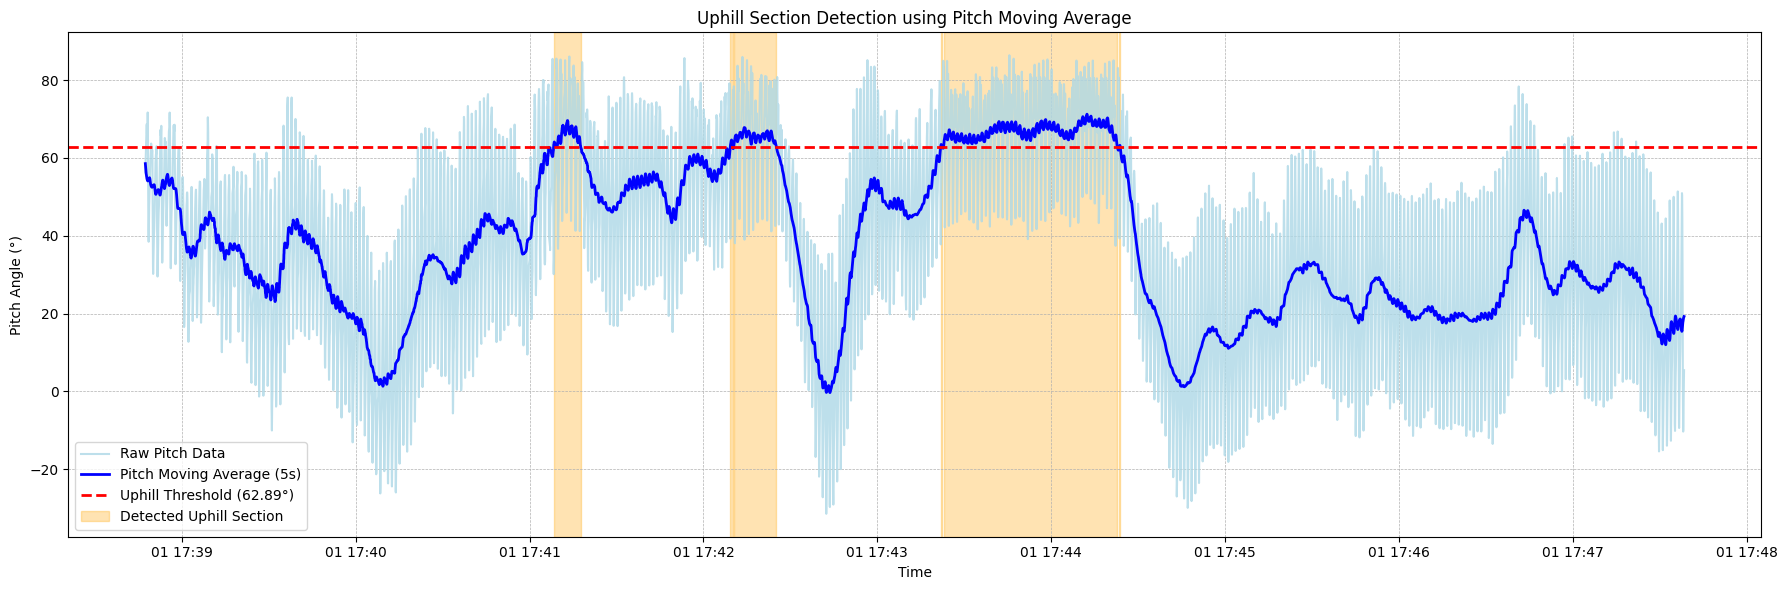

In [131]:

try:
    # 1. 데이터 불러오기 및 시간 변환
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

    # 2. Pitch의 이동 평균 계산
    #    - window_size: 몇 개의 데이터로 평균을 낼지 결정. 30Hz 샘플링이므로 150은 5초에 해당.
    #      이 값을 조절하여 스무딩 강도를 변경할 수 있습니다.
    window_size = 150 
    df['pitch_ma'] = df['Pitch'].rolling(window=window_size, center=True, min_periods=1).mean()

    # 3. 오르막 판단을 위한 임계값(Threshold) 설정
    #    - 전체 Pitch 평균에 표준편차를 더한 값을 기준으로 삼습니다.
    #      이 기준보다 이동 평균이 높으면 오르막으로 판단합니다.
    #    - std_multiplier를 조절하여 민감도를 변경할 수 있습니다. (e.g., 1.5로 높이면 더 가파른 오르막만 감지)
    std_multiplier = 1.0
    threshold = df['Pitch'].mean() + (df['Pitch'].std() * std_multiplier)

    # 4. 시각화
    fig, ax = plt.subplots(figsize=(18, 6))

    # 원본 Pitch 데이터
    ax.plot(df['time'], df['Pitch'], color='lightblue', alpha=0.8, label='Raw Pitch Data')

    # Pitch 이동 평균 데이터
    ax.plot(df['time'], df['pitch_ma'], color='blue', linewidth=2, label='Pitch Moving Average (5s)')

    # 오르막 판단 임계선
    ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Uphill Threshold ({threshold:.2f}°)')

    # 오르막으로 판단되는 구간 음영 처리
    uphill_sections = df['pitch_ma'] > threshold
    # 시작과 끝을 찾아서 axvspan으로 영역 표시
    start_time = None
    for i in range(1, len(uphill_sections)):
        if uphill_sections[i] and not uphill_sections[i-1]:
            start_time = df['time'].iloc[i]
        elif not uphill_sections[i] and uphill_sections[i-1] and start_time is not None:
            end_time = df['time'].iloc[i]
            ax.axvspan(start_time, end_time, color='orange', alpha=0.3, label='_nolegend_')
            start_time = None
    # 마지막 구간 처리
    if start_time is not None:
         ax.axvspan(start_time, df['time'].iloc[-1], color='orange', alpha=0.3, label='_nolegend_')


    ax.set_title('Uphill Section Detection using Pitch Moving Average')
    ax.set_xlabel('Time')
    ax.set_ylabel('Pitch Angle (°)')
    
    # 범례 핸들 생성 (음영 영역 포함)
    handles, labels = ax.get_legend_handles_labels()
    from matplotlib.patches import Patch
    handles.append(Patch(color='orange', alpha=0.3, label='Detected Uphill Section'))
    ax.legend(handles=handles)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('uphill_detection_plot.png')
    print("✅ 오르막 구간 분석 그래프(uphill_detection_plot.png)가 저장되었습니다.")


except FileNotFoundError:
    print("❌ imu_data3.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

--- 파라미터 튜닝 후 결과 ---
✅ 총 544개의 스텝(피크)이 감지되었습니다.
🦶 평균 스텝 주기: 0.975초
⚡ 평균 스텝 주파수: 1.03 Hz (steps/second)


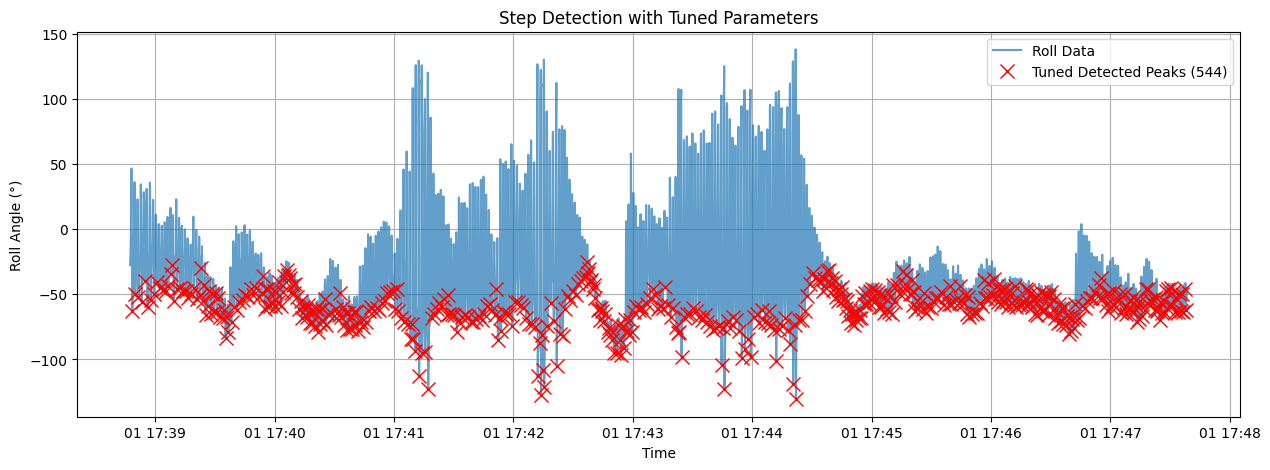

In [129]:
from scipy.signal import find_peaks


try:
    # 1. 데이터 불러오기
    df1 = pd.read_csv('imu_data3.csv')

    # 2. 'time' 열을 datetime 객체로 변환
    df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S.%f')

    # 3. [수정된 부분] 피크 찾기 파라미터 조정
    #    height와 distance를 낮춰서 더 민감하게 실제 스텝을 감지하도록 튜닝
    peaks, _ = find_peaks(-df1["Roll"], height=25, distance=15)

    # 4. 피크가 발생한 시간들을 추출
    peak_times = df1["time"].iloc[peaks]

    # 5. 연속된 피크 사이의 시간 간격(초)을 계산
    step_intervals_seconds = peak_times.diff().dt.total_seconds().dropna()
    
    # 6. 평균 시간 간격(주기)과 주파수 계산
    if not step_intervals_seconds.empty:
        avg_interval = step_intervals_seconds.mean()
        avg_frequency = 1 / avg_interval

        print("--- 파라미터 튜닝 후 결과 ---")
        print(f"✅ 총 {len(peaks)}개의 스텝(피크)이 감지되었습니다.")
        print(f"🦶 평균 스텝 주기: {avg_interval:.3f}초")
        print(f"⚡ 평균 스텝 주파수: {avg_frequency:.2f} Hz (steps/second)")

        # 결과 시각화
        plt.figure(figsize=(15, 5))
        plt.plot(df1['time'], df1['Roll'], label='Roll Data', alpha=0.7)
        plt.plot(peak_times, df1['Roll'].iloc[peaks], "x", color='red', markersize=10, label=f'Tuned Detected Peaks ({len(peaks)})')
        plt.title('Step Detection with Tuned Parameters')
        plt.xlabel('Time')
        plt.ylabel('Roll Angle (°)')
        plt.legend()
        plt.grid(True)
    else:
        print("⚠️ 피크를 찾지 못했습니다. find_peaks의 height나 distance 파라미터를 다시 조정해보세요.")

except FileNotFoundError:
    print("❌ imu_data3.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

✅ 보행 위상도(gait_cyclogram.png)가 저장되었습니다.
✅ 중첩 스텝 분석 그래프(overlaid_steps.png)가 저장되었습니다.


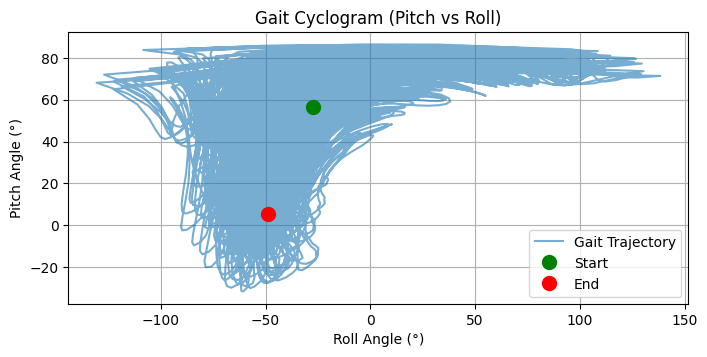

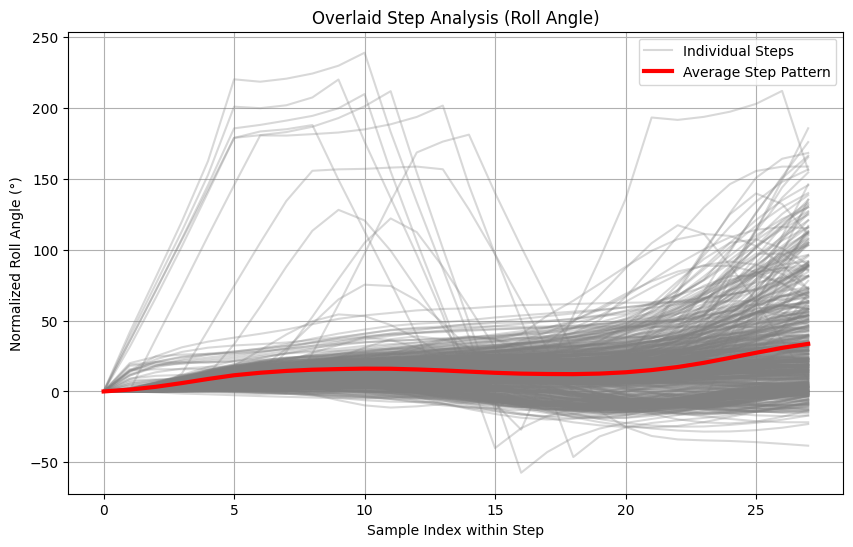

In [130]:

try:
    # 1. 데이터 불러오기 및 시간 변환
    df1 = pd.read_csv('imu_data3.csv')
    df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S.%f')

    # 2. 이전과 동일한 조건으로 스텝(피크) 감지
    peaks, _ = find_peaks(-df1["Roll"], height=25, distance=15)

    # --- 분석 1: 보행 위상도 (Gait Cyclogram) ---
    plt.figure(figsize=(8, 8))
    plt.plot(df1['Roll'], df1['Pitch'], alpha=0.6, label='Gait Trajectory')
    # 시작점과 끝점 표시
    plt.plot(df1['Roll'].iloc[0], df1['Pitch'].iloc[0], 'go', markersize=10, label='Start')
    plt.plot(df1['Roll'].iloc[-1], df1['Pitch'].iloc[-1], 'ro', markersize=10, label='End')
    plt.title('Gait Cyclogram (Pitch vs Roll)')
    plt.xlabel('Roll Angle (°)')
    plt.ylabel('Pitch Angle (°)')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.savefig('gait_cyclogram.png')
    print("✅ 보행 위상도(gait_cyclogram.png)가 저장되었습니다.")


    # --- 분석 2: 중첩 스텝 분석 (Overlaid Steps) ---
    plt.figure(figsize=(10, 6))
    
    # 각 스텝을 잘라내어 겹쳐 그리기
    # 첫 피크부터 시작하여 일정한 길이로 잘라내기 위해, 평균 스텝 간격을 샘플 수로 계산
    avg_interval_samples = int(np.diff(peaks).mean())

    for i in range(len(peaks) - 1):
        # 각 피크 지점부터 평균 스텝 길이만큼의 데이터를 추출
        start_index = peaks[i]
        end_index = start_index + avg_interval_samples
        
        if end_index < len(df1):
            step_segment = df1['Roll'].iloc[start_index:end_index].values
            # 모든 스텝이 0에서 시작하도록 정규화
            normalized_segment = step_segment - step_segment[0]
            
            # 첫 스텝만 레이블을 추가
            if i == 0:
                 plt.plot(normalized_segment, color='gray', alpha=0.3, label='Individual Steps')
            else:
                 plt.plot(normalized_segment, color='gray', alpha=0.3)

    # 모든 스텝의 평균 계산
    all_steps = []
    for i in range(len(peaks) - 1):
        start_index = peaks[i]
        end_index = start_index + avg_interval_samples
        if end_index < len(df1):
             step_segment = df1['Roll'].iloc[start_index:end_index].values
             normalized_segment = step_segment - step_segment[0]
             all_steps.append(normalized_segment)
    
    if all_steps:
        # 배열 길이를 통일하기 위해 가장 짧은 길이에 맞춤
        min_len = min(len(s) for s in all_steps)
        all_steps_truncated = [s[:min_len] for s in all_steps]
        mean_step = np.mean(all_steps_truncated, axis=0)
        plt.plot(mean_step, color='red', linewidth=3, label='Average Step Pattern')


    plt.title('Overlaid Step Analysis (Roll Angle)')
    plt.xlabel('Sample Index within Step')
    plt.ylabel('Normalized Roll Angle (°)')
    plt.grid(True)
    plt.legend()
    plt.savefig('overlaid_steps.png')
    print("✅ 중첩 스텝 분석 그래프(overlaid_steps.png)가 저장되었습니다.")


except FileNotFoundError:
    print("❌ imu_data3.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

데이터 분리 완료: 평지 12921개, 오르막 2497개 샘플
✅ 평지 구간 분석 그래프(gait_analysis_flat.png)가 저장되었습니다.
✅ 오르막 구간 분석 그래프(gait_analysis_uphill.png)가 저장되었습니다.


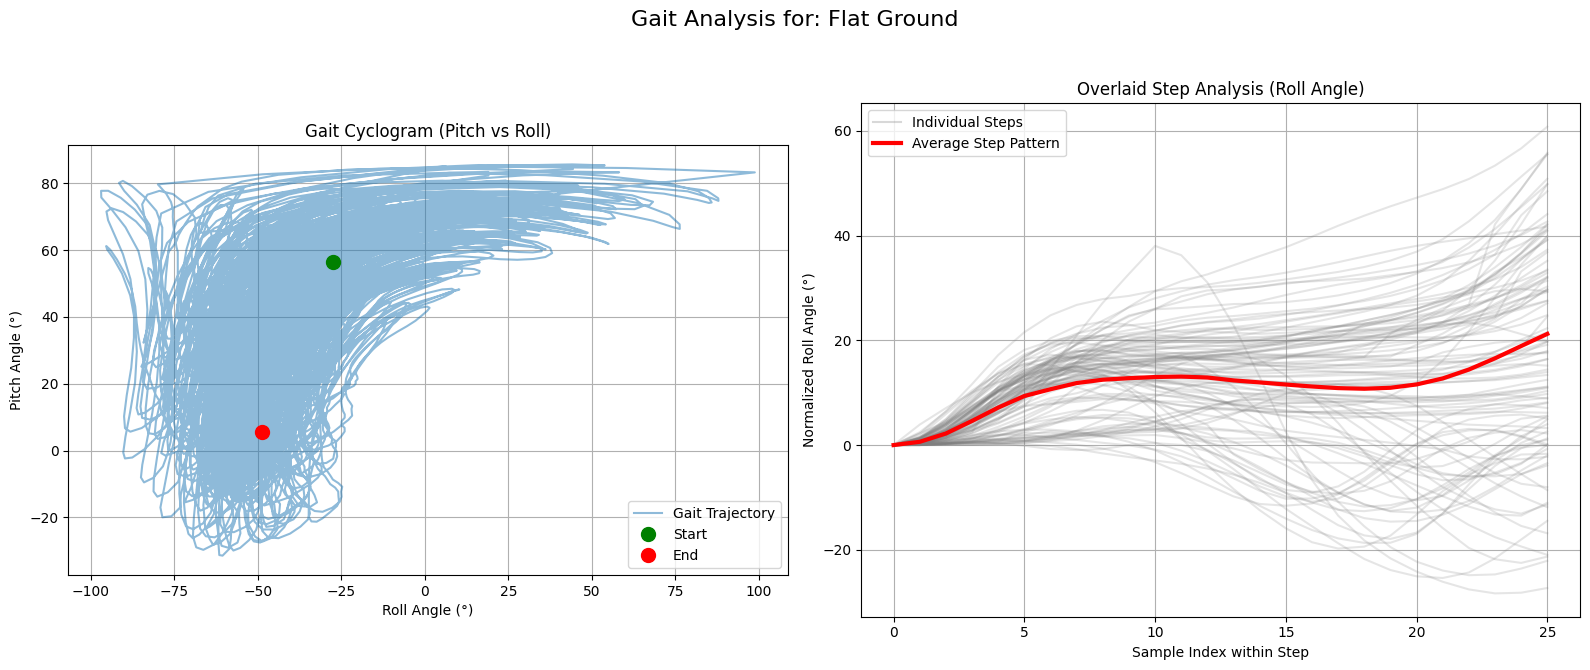

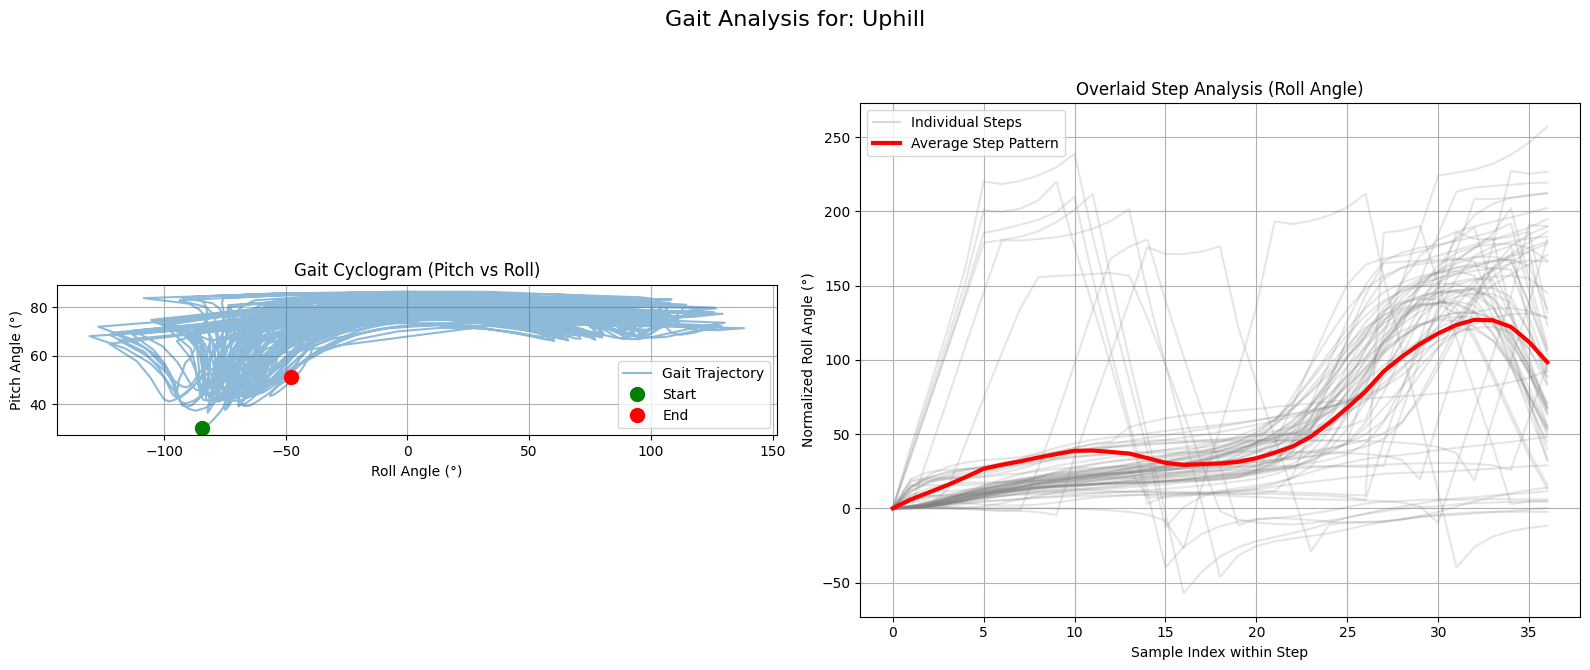

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def analyze_gait_by_condition(df, condition_name):
    """주어진 데이터프레임에 대해 보행 주기 분석을 수행하고 그래프를 반환합니다."""
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Gait Analysis for: {condition_name}', fontsize=16)

    # --- 분석 1: 보행 위상도 (Gait Cyclogram) ---
    ax1 = axes[0]
    ax1.plot(df['Roll'], df['Pitch'], alpha=0.5, label='Gait Trajectory')
    ax1.plot(df['Roll'].iloc[0], df['Pitch'].iloc[0], 'go', markersize=10, label='Start')
    ax1.plot(df['Roll'].iloc[-1], df['Pitch'].iloc[-1], 'ro', markersize=10, label='End')
    ax1.set_title('Gait Cyclogram (Pitch vs Roll)')
    ax1.set_xlabel('Roll Angle (°)')
    ax1.set_ylabel('Pitch Angle (°)')
    ax1.grid(True)
    ax1.set_aspect('equal', adjustable='box')
    ax1.legend()

    # --- 분석 2: 중첩 스텝 분석 (Overlaid Steps) ---
    ax2 = axes[1]
    peaks, _ = find_peaks(-df["Roll"], height=25, distance=15)
    
    if len(peaks) > 1:
        avg_interval_samples = int(np.diff(peaks).mean())
        
        all_steps = []
        for i in range(len(peaks) - 1):
            start_index = peaks[i]
            end_index = start_index + avg_interval_samples
            if end_index < len(df):
                step_segment = df['Roll'].iloc[start_index:end_index].values
                normalized_segment = step_segment - step_segment[0]
                all_steps.append(normalized_segment)
                if i < 100: # 너무 많으면 느려지므로 100개까지만 회색으로 표시
                    ax2.plot(normalized_segment, color='gray', alpha=0.2)

        if all_steps:
            ax2.plot([], [], color='gray', alpha=0.3, label='Individual Steps') # 범례용
            min_len = min(len(s) for s in all_steps)
            all_steps_truncated = [s[:min_len] for s in all_steps]
            mean_step = np.mean(all_steps_truncated, axis=0)
            ax2.plot(mean_step, color='red', linewidth=3, label='Average Step Pattern')

    ax2.set_title('Overlaid Step Analysis (Roll Angle)')
    ax2.set_xlabel('Sample Index within Step')
    ax2.set_ylabel('Normalized Roll Angle (°)')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

try:
    # 1. 데이터 불러오기 및 오르막/평지 분리
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.tz_localize(None) # 시간대 정보 제거

    window_size = 150
    df['pitch_ma'] = df['Pitch'].rolling(window=window_size, center=True, min_periods=1).mean()
    threshold = df['Pitch'].mean() + (df['Pitch'].std() * 1.0)
    
    is_uphill = df['pitch_ma'] > threshold
    
    df_flat = df[~is_uphill].copy()
    df_uphill = df[is_uphill].copy()

    print(f"데이터 분리 완료: 평지 {len(df_flat)}개, 오르막 {len(df_uphill)}개 샘플")

    # 2. 각 조건에 대해 분석 실행 및 저장
    if not df_flat.empty:
        fig_flat = analyze_gait_by_condition(df_flat, "Flat Ground")
        fig_flat.savefig('gait_analysis_flat.png')
        print("✅ 평지 구간 분석 그래프(gait_analysis_flat.png)가 저장되었습니다.")
    
    if not df_uphill.empty:
        fig_uphill = analyze_gait_by_condition(df_uphill, "Uphill")
        fig_uphill.savefig('gait_analysis_uphill.png')
        print("✅ 오르막 구간 분석 그래프(gait_analysis_uphill.png)가 저장되었습니다.")

except FileNotFoundError:
    print("❌ imu_data3.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

--- 자세 정렬 분석 결과 ---
분석된 총 스텝 수: 542개
스윙 시 평균 Yaw 각도: 27.13°
Yaw 각도 표준편차: 58.87° (값이 작을수록 일관된 자세)

✅ 자세 정렬 분석 그래프(posture_alignment_analysis.png)가 저장되었습니다.


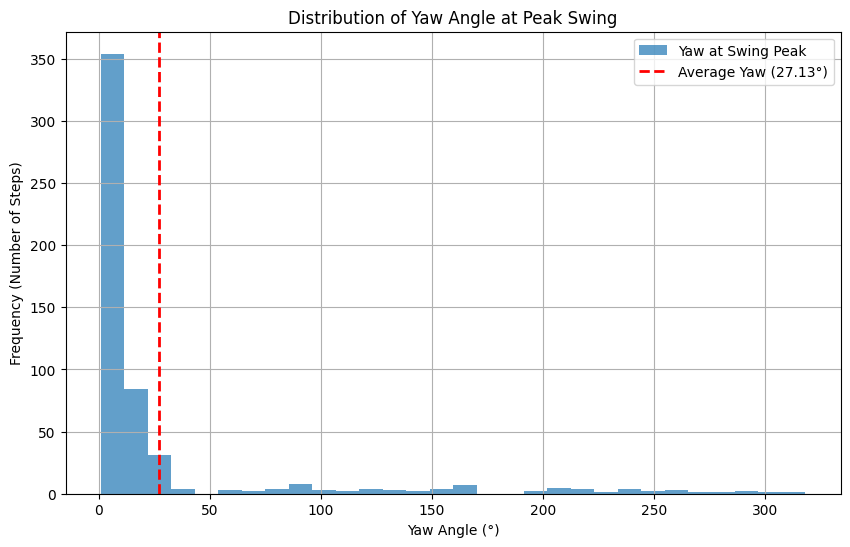

In [5]:

try:
    # 1. 데이터 불러오기 및 시간 변환
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

    # 2. Roll 값 기준으로 각 스텝을 구분하기 위한 피크(골짜기) 찾기
    step_peaks, _ = find_peaks(-df["Roll"], height=25, distance=15)
    
    # 3. 각 스텝의 스윙 최고점에서 Yaw 값을 저장할 리스트
    yaw_at_swing_peak = []

    # 4. 각 스텝 구간을 순회하며 분석
    for i in range(len(step_peaks) - 1):
        # 현재 스텝의 시작과 끝 인덱스 정의
        start_idx = step_peaks[i]
        end_idx = step_peaks[i+1]
        
        # 현재 스텝 구간의 데이터 추출
        step_df = df.iloc[start_idx:end_idx]
        
        # 스텝 구간 내에서 Pitch가 최대인 지점(스윙 최고점)을 찾음
        if not step_df.empty:
            peak_pitch_idx = step_df['Pitch'].idxmax()
            
            # 해당 지점의 Yaw 값을 리스트에 추가 (NaN이 아닌 경우에만)
            yaw_value = df.loc[peak_pitch_idx, 'Yaw']
            if pd.notna(yaw_value):
                yaw_at_swing_peak.append(yaw_value)

    # 5. 결과 분석 및 시각화
    if yaw_at_swing_peak:
        yaw_array = np.array(yaw_at_swing_peak)
        
        # 통계 계산
        mean_yaw = np.mean(yaw_array)
        std_yaw = np.std(yaw_array)
        
        print("--- 자세 정렬 분석 결과 ---")
        print(f"분석된 총 스텝 수: {len(yaw_array)}개")
        print(f"스윙 시 평균 Yaw 각도: {mean_yaw:.2f}°")
        print(f"Yaw 각도 표준편차: {std_yaw:.2f}° (값이 작을수록 일관된 자세)")
        
        # 히스토그램 시각화
        plt.figure(figsize=(10, 6))
        plt.hist(yaw_array, bins=30, alpha=0.7, label='Yaw at Swing Peak')
        plt.axvline(mean_yaw, color='red', linestyle='--', linewidth=2, label=f'Average Yaw ({mean_yaw:.2f}°)')
        
        plt.title('Distribution of Yaw Angle at Peak Swing')
        plt.xlabel('Yaw Angle (°)')
        plt.ylabel('Frequency (Number of Steps)')
        plt.legend()
        plt.grid(True)
        
        plt.savefig('posture_alignment_analysis.png')
        print("\n✅ 자세 정렬 분석 그래프(posture_alignment_analysis.png)가 저장되었습니다.")

    else:
        print("⚠️ 분석할 스텝 데이터가 부족합니다.")

except FileNotFoundError:
    print("❌ imu_data3.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

          Time_sec  Left_Knee_Angle  Right_Knee_Angle  Step_Width_px
count  2224.000000      2224.000000       2224.000000    2224.000000
mean     66.631746       164.074554        168.859269      23.865818
std      25.935350        21.554442         17.700484      22.174982
min      11.737668         1.385704         10.587609       0.046406
25%      44.028308       161.902078        168.747542       8.661215
50%      67.077863       171.133363        174.441753      19.052171
75%      89.329061       175.991724        177.623520      33.548727
max     110.968726       179.994888        179.999765     252.474613


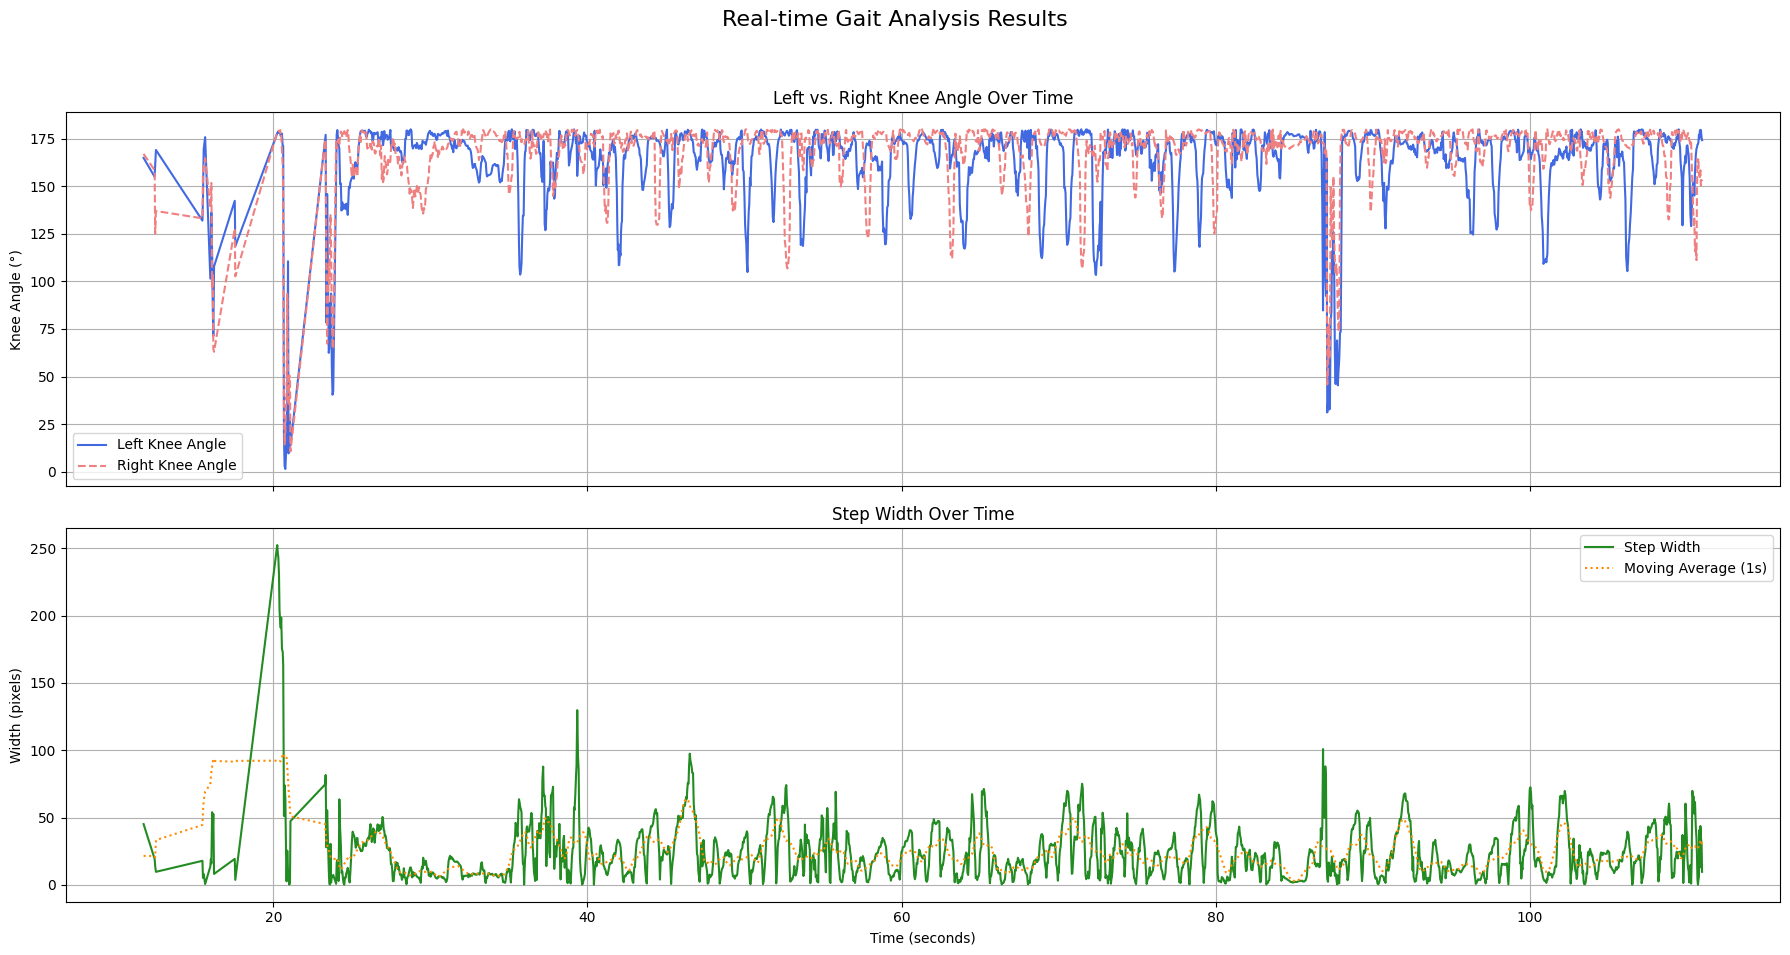

In [11]:

try:
    # 1. 방금 저장한 CSV 파일 불러오기
    df = pd.read_csv('realtime_gait_analysis.csv')

    # 2. 분석 결과 시각화
    # 2개의 그래프를 위아래로 배치
    fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
    fig.suptitle('Real-time Gait Analysis Results', fontsize=16)

    # --- 그래프 1: 좌우 무릎 각도 변화 ---
    axes[0].plot(df['Time_sec'], df['Left_Knee_Angle'], label='Left Knee Angle', color='royalblue')
    axes[0].plot(df['Time_sec'], df['Right_Knee_Angle'], label='Right Knee Angle', color='lightcoral', linestyle='--')
    axes[0].set_title('Left vs. Right Knee Angle Over Time')
    axes[0].set_ylabel('Knee Angle (°)')
    axes[0].grid(True)
    axes[0].legend()

    # --- 그래프 2: 보폭 너비 변화 ---
    axes[1].plot(df['Time_sec'], df['Step_Width_px'], label='Step Width', color='forestgreen')
    
    # 보폭 너비의 이동 평균을 함께 그려서 추세를 확인
    rolling_avg = df['Step_Width_px'].rolling(window=30, center=True, min_periods=1).mean()
    axes[1].plot(df['Time_sec'], rolling_avg, label='Moving Average (1s)', color='darkorange', linestyle=':')
    
    axes[1].set_title('Step Width Over Time')
    axes[1].set_ylabel('Width (pixels)')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].grid(True)
    axes[1].legend()

    # 그래프 레이아웃 정리 및 파일 저장
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    print(df.describe())


except FileNotFoundError:
    print("❌ 'realtime_gait_analysis.csv' 파일을 찾을 수 없습니다. 파일이 스크립트와 같은 폴더에 있는지 확인해주세요.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

✅ 데이터 동기화 및 자르기 완료!

📈 최종 교차 검증 그래프(final_cross_validation_sync.png)가 저장되었습니다.


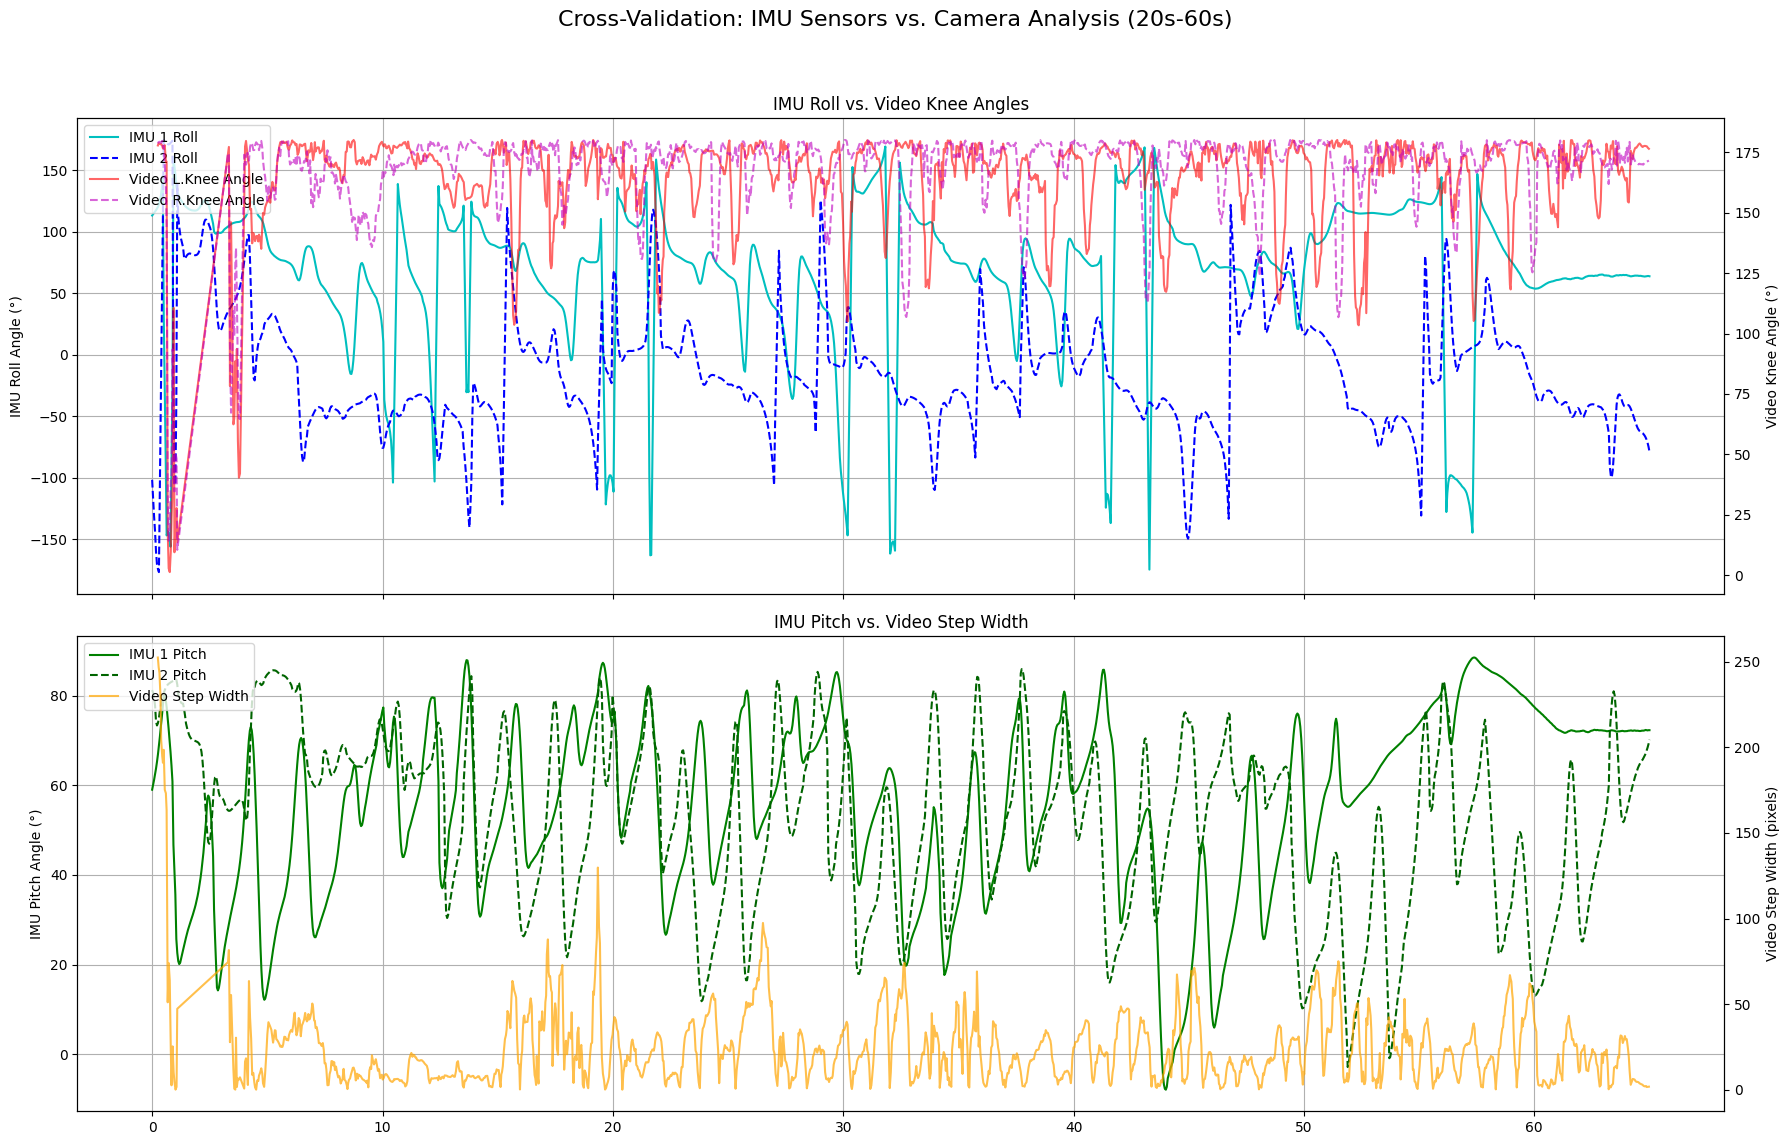

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def find_stomp_index(df, signal_column):
    """주어진 데이터프레임과 컬럼명으로 충격량이 가장 큰 지점의 인덱스를 찾습니다."""
    signal = df[signal_column]
    impact_magnitude = signal.diff().abs()
    stomp_index = impact_magnitude.idxmax()
    # 첫 데이터의 diff는 NaN이므로, 1을 더해줌
    return stomp_index if pd.notna(stomp_index) else 1

try:
    # 1. 모든 데이터 파일 불러오기
    imu5_df = pd.read_csv('imu_data5.csv')
    imu6_df = pd.read_csv('imu_data6.csv')
    video_df = pd.read_csv('realtime_gait_analysis.csv')

    # 2. 각 데이터에서 '발 구르기' 동기화 지점 탐지
    stomp_idx_imu5 = find_stomp_index(imu5_df, 'Roll')
    stomp_idx_imu6 = find_stomp_index(imu6_df, 'Roll')
    stomp_idx_video = find_stomp_index(video_df, 'Left_Knee_Angle')

    # 3. 분석 구간 자르기
    # 기준이 되는 영상 데이터의 시간 정의
    video_start_sec = 20.0
    video_end_sec = 85.0
    
    # 영상 데이터에서 20초와 60초에 가장 가까운 인덱스 찾기
    video_start_idx = (video_df['Time_sec'] - video_start_sec).abs().idxmin()
    video_end_idx = (video_df['Time_sec'] - video_end_sec).abs().idxmin()

    # 발 구르기 시점과 분석 시작 시점 사이의 샘플 수 차이 계산
    offset_samples = video_start_idx - stomp_idx_video
    
    # 분석할 샘플 길이 계산
    analysis_samples = video_end_idx - video_start_idx
    
    # 각 IMU 데이터의 분석 시작/끝 인덱스 계산
    imu5_start_idx = stomp_idx_imu5 + offset_samples
    imu5_end_idx = imu5_start_idx + analysis_samples
    
    imu6_start_idx = stomp_idx_imu6 + offset_samples
    imu6_end_idx = imu6_start_idx + analysis_samples

    # 각 데이터프레임을 정의된 구간으로 자르기
    imu5_cropped = imu5_df.iloc[imu5_start_idx:imu5_end_idx].copy()
    imu6_cropped = imu6_df.iloc[imu6_start_idx:imu6_end_idx].copy()
    video_cropped = video_df.iloc[video_start_idx:video_end_idx].copy()

    # 비교를 위해 새로운 시간 축(0초부터 시작) 생성
    imu5_cropped['Rel_Time'] = np.linspace(0, video_end_sec - video_start_sec, len(imu5_cropped))
    imu6_cropped['Rel_Time'] = np.linspace(0, video_end_sec - video_start_sec, len(imu6_cropped))
    video_cropped['Rel_Time'] = video_cropped['Time_sec'] - video_start_sec

    print("✅ 데이터 동기화 및 자르기 완료!")

    # 4. 비교 시각화
    fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)
    fig.suptitle('Cross-Validation: IMU Sensors vs. Camera Analysis (20s-85s)', fontsize=16)

    # --- 그래프 1: IMU Roll vs. Video Knee Angle ---
    ax1 = axes[0]
    ax1_twin = ax1.twinx()
    
    p1, = ax1.plot(imu5_cropped['Rel_Time'], imu5_cropped['Roll'], 'c-', label='IMU 1 Roll')
    p2, = ax1.plot(imu6_cropped['Rel_Time'], imu6_cropped['Roll'], 'b--', label='IMU 2 Roll')
    p3, = ax1_twin.plot(video_cropped['Rel_Time'], video_cropped['Left_Knee_Angle'], 'r-', alpha=0.6, label='Video L.Knee Angle')
    p4, = ax1_twin.plot(video_cropped['Rel_Time'], video_cropped['Right_Knee_Angle'], 'm--', alpha=0.6, label='Video R.Knee Angle')
    
    ax1.set_ylabel('IMU Roll Angle (°)')
    ax1_twin.set_ylabel('Video Knee Angle (°)')
    ax1.set_title('IMU Roll vs. Video Knee Angles')
    ax1.grid(True)
    ax1.legend(handles=[p1, p2, p3, p4], loc='upper left')

    # --- 그래프 2: IMU Pitch vs. Video Step Width ---
    ax2 = axes[1]
    ax2_twin = ax2.twinx()
    
    p5, = ax2.plot(imu5_cropped['Rel_Time'], imu5_cropped['Pitch'], 'g-', label='IMU 1 Pitch')
    p6, = ax2.plot(imu6_cropped['Rel_Time'], imu6_cropped['Pitch'], 'darkgreen', linestyle='--', label='IMU 2 Pitch')
    p7, = ax2_twin.plot(video_cropped['Rel_Time'], video_cropped['Step_Width_px'], 'orange', alpha=0.7, label='Video Step Width')
    
    ax2.set_ylabel('IMU Pitch Angle (°)')
    ax2_twin.set_ylabel('Video Step Width (pixels)')
    ax2.set_title('IMU Pitch vs. Video Step Width')
    ax2.grid(True)
    ax2.legend(handles=[p5, p6, p7], loc='upper left')

    plt.xlabel('Analysis Time (seconds)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

except FileNotFoundError:
    print("❌ 필요한 CSV 파일들을 찾을 수 없습니다. (imu_data5.csv, imu_data6.csv, realtime_gait_analysis.csv)")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

✅ 데이터 동기화 및 통합 완료!


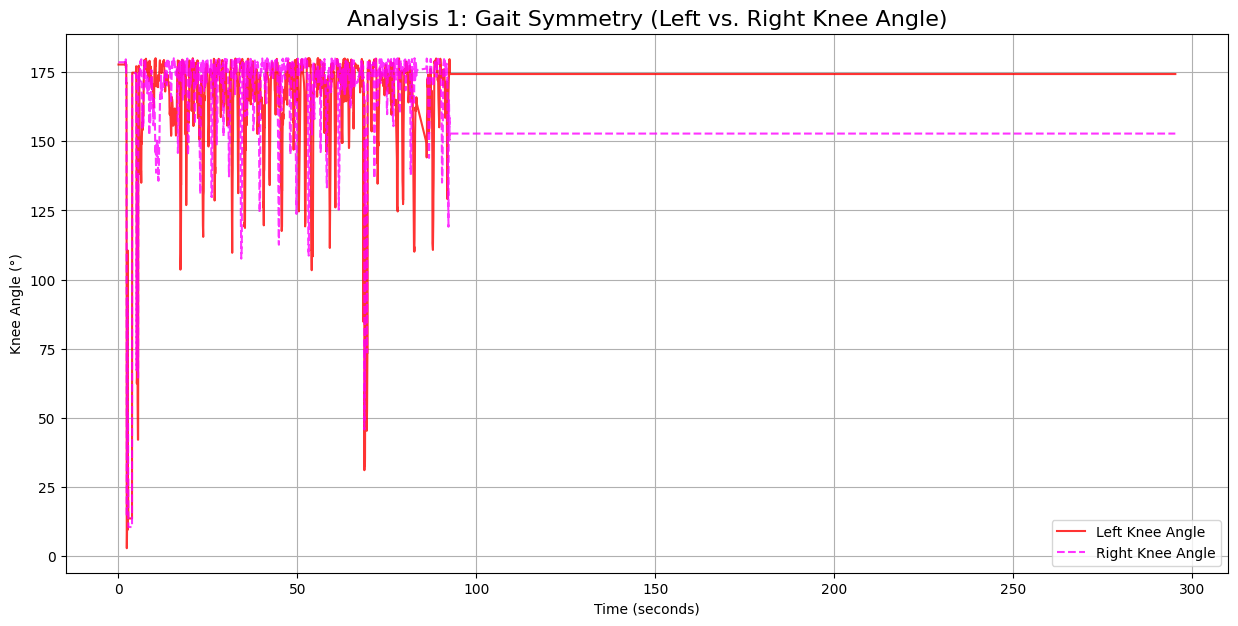

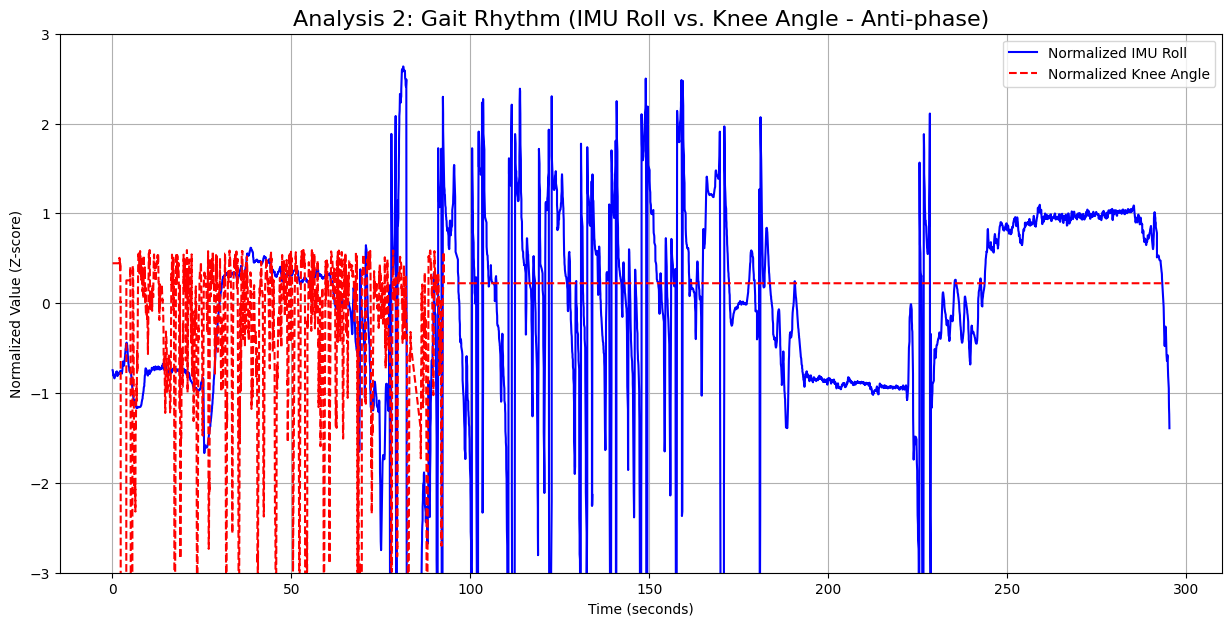

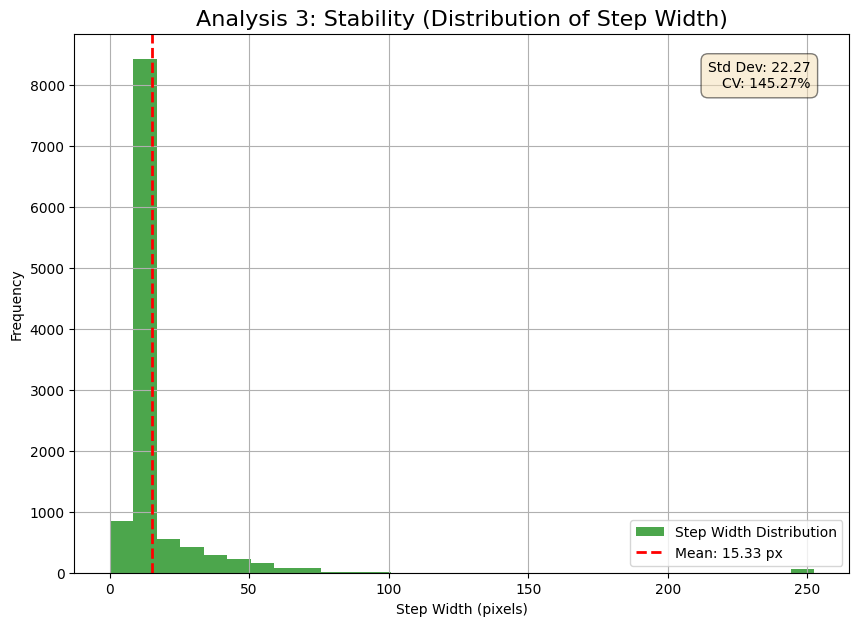

In [13]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- 🚨 1단계에서 찾은 동기화 시간을 여기에 입력하세요 ---
IMU_SYNC_TIME = '16:26:27.756000'  # 예시: IMU 데이터에서 발 구른 시간
VIDEO_SYNC_TIME_SEC = 18.337583      # 예시: 영상 데이터에서 발 구른 경과 시간
# ---------------------------------------------------------

try:
    # --- 1. 데이터 불러오기 및 동기화/통합 (이전과 동일) ---
    imu5_df = pd.read_csv('imu_data5.csv')
    video_df = pd.read_csv('realtime_gait_analysis.csv')

    imu5_df['time'] = pd.to_datetime(imu5_df['time'], format='%H:%M:%S.%f')
    imu_sync_ts = pd.to_datetime(IMU_SYNC_TIME, format='%H:%M:%S.%f')
    imu5_df = imu5_df[imu5_df['time'] >= imu_sync_ts].copy()
    imu5_df['elapsed_sec'] = (imu5_df['time'] - imu_sync_ts).dt.total_seconds()
    imu5_df.set_index('elapsed_sec', inplace=True)
    
    video_df = video_df[video_df['Time_sec'] >= VIDEO_SYNC_TIME_SEC].copy()
    video_df['elapsed_sec'] = video_df['Time_sec'] - VIDEO_SYNC_TIME_SEC
    video_df.set_index('elapsed_sec', inplace=True)

    combined_df = imu5_df.join(video_df.reindex(imu5_df.index, method='nearest'), how='inner').dropna()
    print("✅ 데이터 동기화 및 통합 완료!")

    # --- 2. 분석 1: 보행 대칭성 시각화 ---
    plt.figure(figsize=(15, 7))
    plt.plot(combined_df.index, combined_df['Left_Knee_Angle'], label='Left Knee Angle', color='red', alpha=0.8)
    plt.plot(combined_df.index, combined_df['Right_Knee_Angle'], label='Right Knee Angle', color='magenta', linestyle='--', alpha=0.8)
    plt.title('Analysis 1: Gait Symmetry (Left vs. Right Knee Angle)', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Knee Angle (°)')
    plt.legend()
    plt.grid(True)

    # --- 3. 분석 2: 보행 리듬 시각화 ---
    # 데이터 정규화 (z-score)
    roll_norm = (combined_df['Roll'] - combined_df['Roll'].mean()) / combined_df['Roll'].std()
    knee_norm = (combined_df['Left_Knee_Angle'] - combined_df['Left_Knee_Angle'].mean()) / combined_df['Left_Knee_Angle'].std()
    
    plt.figure(figsize=(15, 7))
    plt.plot(combined_df.index, roll_norm, label='Normalized IMU Roll', color='blue')
    plt.plot(combined_df.index, knee_norm, label='Normalized Knee Angle', color='red', linestyle='--')
    plt.title('Analysis 2: Gait Rhythm (IMU Roll vs. Knee Angle - Anti-phase)', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Normalized Value (Z-score)')
    plt.legend()
    plt.grid(True)
    # y축의 0을 기준으로 위아래가 잘 보이도록 범위 설정
    plt.ylim(-3, 3)

    # --- 4. 분석 3: 안정성 시각화 ---
    step_width_mean = combined_df['Step_Width_px'].mean()
    step_width_std = combined_df['Step_Width_px'].std()
    step_width_cv = (step_width_std / step_width_mean) * 100
    
    plt.figure(figsize=(10, 7))
    plt.hist(combined_df['Step_Width_px'], bins=30, alpha=0.7, color='green', label='Step Width Distribution')
    plt.axvline(step_width_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {step_width_mean:.2f} px')
    
    # 텍스트 정보 추가
    plt.text(0.95, 0.95, f'Std Dev: {step_width_std:.2f}\nCV: {step_width_cv:.2f}%', 
             ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
             
    plt.title('Analysis 3: Stability (Distribution of Step Width)', fontsize=16)
    plt.xlabel('Step Width (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

except FileNotFoundError:
    print("❌ 필요한 CSV 파일들을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")